# Final task

## EDA with the help of ML models

### Elizaveta Rodionova

### Task

#### Data: credit-card-approval

- Define 'good' or 'bad' clients

- Show the difference between these two types

- Is there a gender gap?

- Predict if an applicant is a 'good' or 'bad' client


## 1/ Define 'good' or 'bad' clients

### 1/1 Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
application = pd.read_csv('C:/Users/ЛИЗА/Documents/GitHub/DS_DAPS/99-final-project/data/credit-card-approval/application_record.csv', engine='python', sep=',')
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Only the variable 'OCCUPATION_TYPE' has missings, but it's number is huge! 

In [4]:
application['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [5]:
application.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

Number of unique IDs is less than the total number of rows, that is, there are dublicates: the same person applied several times. We will just drop dublicates for that time. 

Variable 'FLAG_MOBIL' has only one unique value, that is a constant: probably, all applicants have mobile phones. We will not use this variable. 

Also there is a number of binary variables: gender, car, realty, phone, work phone, email.

Other categorical variables: № of children and family mambers, income, education, housing and occupation types, family status.

A number of numeric variables are present: amount of income, days from birth and employment. 

From README file: "DAYS_EMPLOYED	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed." 

Taking this into account, we will turn all the positive numbers to zero and add the category 'Unemployed' to the variable 'OCCUPATION_TYPE' (the original variable doesn't contain such a category).

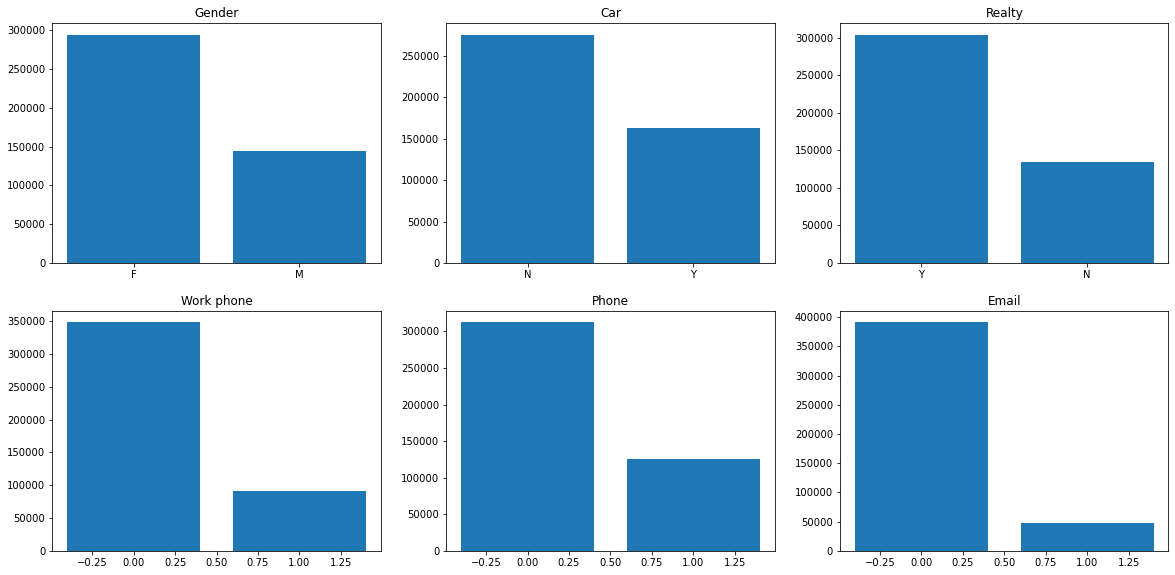

In [6]:
plt.figure(figsize=[20, 15])
plt.subplot(3,3,1)
plt.bar(application['CODE_GENDER'].value_counts().keys().tolist(), application['CODE_GENDER'].value_counts().tolist())
plt.title('Gender')
plt.subplot(3,3,2)
plt.bar(application['FLAG_OWN_CAR'].value_counts().keys().tolist(), application['FLAG_OWN_CAR'].value_counts().tolist())
plt.title('Car')
plt.subplot(3,3,3)
plt.bar(application['FLAG_OWN_REALTY'].value_counts().keys().tolist(), application['FLAG_OWN_REALTY'].value_counts().tolist())
plt.title('Realty')
plt.subplot(3,3,4)
plt.bar(application['FLAG_WORK_PHONE'].value_counts().keys().tolist(), application['FLAG_WORK_PHONE'].value_counts().tolist())
plt.title('Work phone')
plt.subplot(3,3,5)
plt.bar(application['FLAG_PHONE'].value_counts().keys().tolist(), application['FLAG_PHONE'].value_counts().tolist())
plt.title('Phone')
plt.subplot(3,3,6)
plt.bar(application['FLAG_EMAIL'].value_counts().keys().tolist(), application['FLAG_EMAIL'].value_counts().tolist())
plt.title('Email')

plt.show()

- We see a great sample disbalance in terms of gender: female applicants are almost two times larger group. 
- The majority of people do not own a car, but have some realty. 
- Although in different proportions, but people tend to do not have work phone, phone o email. This observation goes in line with the fact that all of them own a mobile phone. 

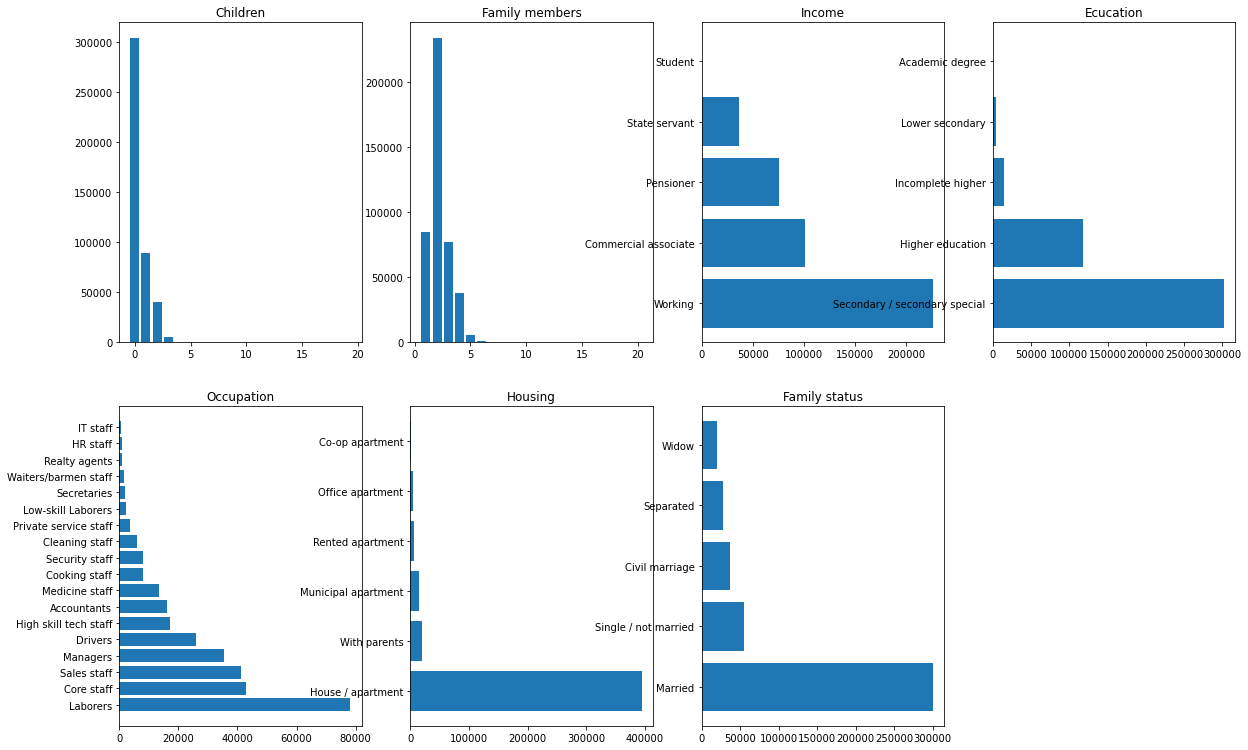

In [7]:
plt.figure(figsize=[20, 20])
plt.subplot(3,4,1)
plt.bar(application['CNT_CHILDREN'].value_counts().keys().tolist(), application['CNT_CHILDREN'].value_counts().tolist())
plt.title('Children')
plt.subplot(3,4,2)
plt.bar(application['CNT_FAM_MEMBERS'].value_counts().keys().tolist(), application['CNT_FAM_MEMBERS'].value_counts().tolist())
plt.title('Family members')
plt.subplot(3,4,3)
plt.barh(application['NAME_INCOME_TYPE'].value_counts().keys().tolist(), application['NAME_INCOME_TYPE'].value_counts().tolist())
plt.title('Income')
plt.subplot(3,4,4)
plt.barh(application['NAME_EDUCATION_TYPE'].value_counts().keys().tolist(), application['NAME_EDUCATION_TYPE'].value_counts().tolist())
plt.title('Ecucation')
plt.subplot(3,4,5)
plt.barh(application['OCCUPATION_TYPE'].value_counts().keys().tolist(), application['OCCUPATION_TYPE'].value_counts().tolist())
plt.title('Occupation')
plt.subplot(3,4,6)
plt.barh(application['NAME_HOUSING_TYPE'].value_counts().keys().tolist(), application['NAME_HOUSING_TYPE'].value_counts().tolist())
plt.title('Housing')
plt.subplot(3,4,7)
plt.barh(application['NAME_FAMILY_STATUS'].value_counts().keys().tolist(), application['NAME_FAMILY_STATUS'].value_counts().tolist())
plt.title('Family status')

plt.show()

In [8]:
print("N of children:\n", application['CNT_CHILDREN'].value_counts(), "\nN of family members:\n", application['CNT_CHILDREN'].value_counts())

N of children:
 0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64 
N of family members:
 0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64


- The majority of our sample have up to 3 children and up to 4 family members. However, the ouliers exist which have both more than 10 children and family members. The figure never show one that because of disproportionally small number of such a people, but I printed the numbers below the graph.
- Most of applicants are working people, the smallest income group is students.
- The majority have either secondary or higher education.
- The occupation type of the applicants are diverse. The biggest group is laborers, the significant groups are core and sales staff, managers and drivers. 
- Almost in every case, an applicant has his or her own house or appartment.
- The largest group of applicants are legally married. 

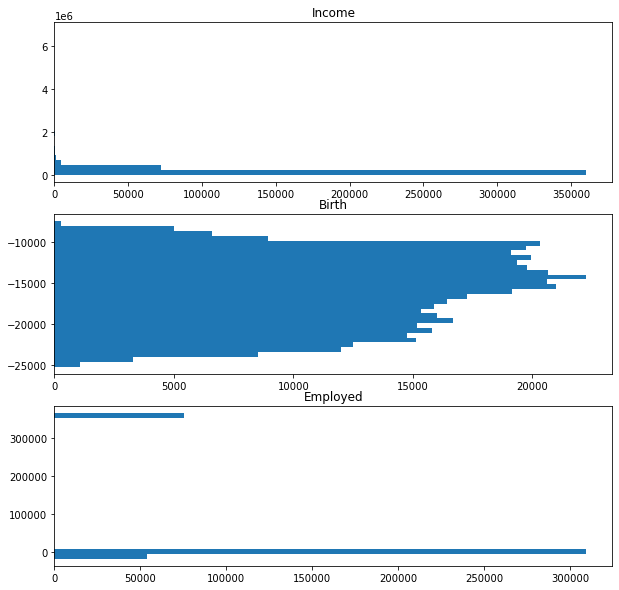

In [9]:
plt.figure(figsize=[10, 10])
plt.subplot(3,1,1)
plt.hist(application['AMT_INCOME_TOTAL'], density=False, bins=30, orientation='horizontal')
plt.title('Income')
plt.subplot(3,1,2)
plt.hist(application['DAYS_BIRTH'], density=False, bins=30, orientation='horizontal')
plt.title('Birth')
plt.subplot(3,1,3)
plt.hist(application['DAYS_EMPLOYED'], density=False, bins=30, orientation='horizontal')
plt.title('Employed')

plt.show()

In [10]:
print(application['AMT_INCOME_TOTAL'].describe())
application['AMT_INCOME_TOTAL'].value_counts()

count    4.385570e+05
mean     1.875243e+05
std      1.100869e+05
min      2.610000e+04
25%      1.215000e+05
50%      1.607805e+05
75%      2.250000e+05
max      6.750000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64

In [11]:
print(application['DAYS_BIRTH'].describe())
application['DAYS_BIRTH'].value_counts()

count    438557.000000
mean     -15997.904649
std        4185.030007
min      -25201.000000
25%      -19483.000000
50%      -15630.000000
75%      -12514.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


-11707    150
-14178    121
-14400    116
-13482    112
-13274    112
         ... 
-8207       1
-8286       1
-12793      1
-24592      1
-8590       1
Name: DAYS_BIRTH, Length: 16379, dtype: int64

In [12]:
application.drop_duplicates(subset=['ID'], keep = 'last', inplace=True)
application.drop(['FLAG_MOBIL'], axis=1, inplace=True)
application.loc[application['DAYS_EMPLOYED'] >= 0, 'DAYS_EMPLOYED'] = 0
application.loc[application['DAYS_EMPLOYED'] == 0, 'OCCUPATION_TYPE'] = 'Unemployed'
print(application.shape)
application.isnull().sum()

(438510, 17)


ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        58868
CNT_FAM_MEMBERS            0
dtype: int64

Thus, we reduced the number of NANs by more than half. nice.

In [13]:
print(application['DAYS_EMPLOYED'].describe())
application['DAYS_EMPLOYED'].value_counts()

count    438510.000000
mean      -2172.551841
std        2397.432961
min      -17531.000000
25%       -3103.000000
50%       -1468.000000
75%        -371.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64


 0        75319
-218        262
-1678       251
-249        241
-978        240
          ...  
-13529        1
-10223        1
-8917         1
-11429        1
-8105         1
Name: DAYS_EMPLOYED, Length: 9406, dtype: int64

For our numeric variables figures looks wierd, but we can use descriptive statistics for these purposes also. 

- The mean annual income is 187 000 (have no idea in which currency it is). The maximum amount is around 6 mln, the minimum is around 20 thousands. The median is close to the mean, but somewhat smaller, that is, our distribution is skewed to the right, to larger numbers (remember about 6 mln income).
- The age is in the form of negative numbers. The mean age is 44. The oldest applicant is in his or her 69, the youngest - almost 21. The age ratio is clear, kids do not need money. This distribution is close to normal. 
- The Days Employed varialbe is also negative. The mean employed time is around 6 years, with maximum and minimum numbers nearly 48 and 0, respectively. The distribution skewed to the right because the median is about 4 years. In the figure we can see a bulk of 0 values which cause this skewedness. That is unemployed people or pensioners. 

### 1/2 Defining good and bad clients

In [14]:
credit = pd.read_csv('C:/Users/ЛИЗА/Documents/GitHub/DS_DAPS/99-final-project/data/credit-card-approval/credit_record.csv', engine='python', sep=',')
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [15]:
credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [16]:
credit.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

From README file: "STATUS	Status	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month".

If a client has overdues bigger than 29 days, then it is a 'bad' debtor. Otherwise if a client has no overdues, then it is a 'good' debtor. Everything in the middle will be fair to consider as a neutral behavior. This is what we will do. 

Then count the number of 'good', 'bad' and 'neutral' mounths.

We will decide on the status (good or bad client) on the basis of the number of good and bad months alone (neutral months are left aside here). **Principle: We will compare good, neutral and bad behavior: good is better than neutral, neutral is better than bad; the opposite is also true.**

We will sum up th number of months in the credit record (good, bad and neutral). It can be a factor helping to determine the credit decision.

There is a slight increase in females who are 'good' clients compared to their proportion of 'bad' clients. And the opposite trajectory we can see in male category.

In [137]:
credit_try = credit
credit_try

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [138]:
status_try = {'C' : 'good',
          'X' : 'good',
          '0' : 'neutral',
          '1' : 'bad',
          '2' : 'bad',
          '3' : 'bad',
          '4' : 'bad',
          '5' : 'bad'}

credit_try = credit_try.replace({'STATUS' : status_try})
credit_try_new = credit_try.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0).reset_index()
credit_try_new

STATUS,ID,bad,good,neutral
0,5001711,0,1,3
1,5001712,0,9,10
2,5001713,0,22,0
3,5001714,0,15,0
4,5001715,0,60,0
...,...,...,...,...
45980,5150482,0,6,12
45981,5150483,0,18,0
45982,5150484,0,1,12
45983,5150485,0,0,2


In [139]:
credit_try_new.loc[(credit_try_new['good'] > credit_try_new['neutral']), 'status'] = 1
credit_try_new.loc[(credit_try_new['good'] > credit_try_new['bad']), 'status'] = 1
credit_try_new.loc[(credit_try_new['neutral'] > credit_try_new['good']), 'status'] = 0
credit_try_new.loc[(credit_try_new['neutral'] > credit_try_new['bad']), 'status'] = 1
credit_try_new.loc[(credit_try_new['bad'] > credit_try_new['good']), 'status'] = 0
credit_try_new.loc[(credit_try_new['bad'] > credit_try_new['neutral']), 'status'] = 0
print(credit_try_new['status'].value_counts())
credit_try_new

1.0    44205
0.0     1758
Name: status, dtype: int64


STATUS,ID,bad,good,neutral,status
0,5001711,0,1,3,1.0
1,5001712,0,9,10,1.0
2,5001713,0,22,0,1.0
3,5001714,0,15,0,1.0
4,5001715,0,60,0,1.0
...,...,...,...,...,...
45980,5150482,0,6,12,1.0
45981,5150483,0,18,0,1.0
45982,5150484,0,1,12,1.0
45983,5150485,0,0,2,1.0


In [144]:
credit_try_new['months_in_record'] = credit_try_new['good'] + credit_try_new['neutral'] + credit_try_new['bad']
credit_try_new

STATUS,ID,bad,good,neutral,status,months_in_record
0,5001711,0,1,3,1.0,4
1,5001712,0,9,10,1.0,19
2,5001713,0,22,0,1.0,22
3,5001714,0,15,0,1.0,15
4,5001715,0,60,0,1.0,60
...,...,...,...,...,...,...
45980,5150482,0,6,12,1.0,18
45981,5150483,0,18,0,1.0,18
45982,5150484,0,1,12,1.0,13
45983,5150485,0,0,2,1.0,2


In [145]:
merg = application.reset_index().merge(credit_try_new, on='ID').set_index('index')
merg

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,bad,good,neutral,status,months_in_record
index,,,,,,,,,,,,,,,,,,,,,
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,1,14,1,1.0,16
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,1,13,1,1.0,15
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,23,7,1.0,30
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,3,2,1.0,5
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,5,0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Managers,2.0,4,8,0,0.0,12
434809,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,18,5,1,0.0,24
434810,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,18,14,1,0.0,33


### Thus, after all this not so long procedure we have 44,205 good clients and 1,758 bad ones. 

Now we need to merge the two dataframes and set the true types of variables in order to prepare them for the further analysis. 

## 1/3 Difference between 'good' and 'bad' clients in terms of gender

In [25]:
pd.crosstab(merged['status'], merged['CODE_GENDER'], margins = True)

CODE_GENDER,F,M,All
status,,,
0,106,70,176
1,24324,11957,36281
All,24430,12027,36457


In [29]:
pd.crosstab(merged['status'], merged['CODE_GENDER'], margins = True, normalize = 'index')

CODE_GENDER,F,M
status,,
0,0.602273,0.397727
1,0.670434,0.329566
All,0.670105,0.329895


We can see a slight increase in the proportion of female clients which are 'good' compared to the 'bad' ones. And the opposite scenario is shown for male clients.

## 2/ Decision Tree analysis

The selection of a decision tree is motivated by the transparency of its mechanism in the classification process.

In [26]:
import sklearn as sk
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 20)
plt.rcParams["figure.figsize"] = (12,8)

In [146]:
merg[["CNT_CHILDREN",  "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL",  "CNT_FAM_MEMBERS"]] = merg[["CNT_CHILDREN",  "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL",  "CNT_FAM_MEMBERS"]].astype('int').astype('object')
merg.drop(['good', 'neutral', 'bad', 'ID'], axis=1, inplace=True)
merg = merg[merg['OCCUPATION_TYPE'].notna()]
merg = merg[merg['status'].notna()]
merg.dtypes

CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN            object
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_WORK_PHONE         object
FLAG_PHONE              object
FLAG_EMAIL              object
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS         object
status                 float64
months_in_record         int64
dtype: object

In [147]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(merg[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        merg.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [148]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE']
Cat_to_Num(categorical_features)

CODE_GENDER --> {'F': 0, 'M': 1}
FLAG_OWN_CAR --> {'N': 0, 'Y': 1}
FLAG_OWN_REALTY --> {'N': 0, 'Y': 1}
NAME_INCOME_TYPE --> {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_FAMILY_STATUS --> {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
OCCUPATION_TYPE --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Unemployed': 17, 'Waiters/barmen staff': 18}
NAME_HOUSING_TYPE --> {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
NAME_EDUCATION_TYPE --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secon

In [149]:
X1 = merg.loc[:, merg.columns != 'status']
y1 = merg['status']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [150]:
random_state = 42

dt11 = DecisionTreeClassifier(random_state=random_state, max_depth = 3)

dt11.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=3, random_state=42)

## 3/ The issue of gender gap. Prediction

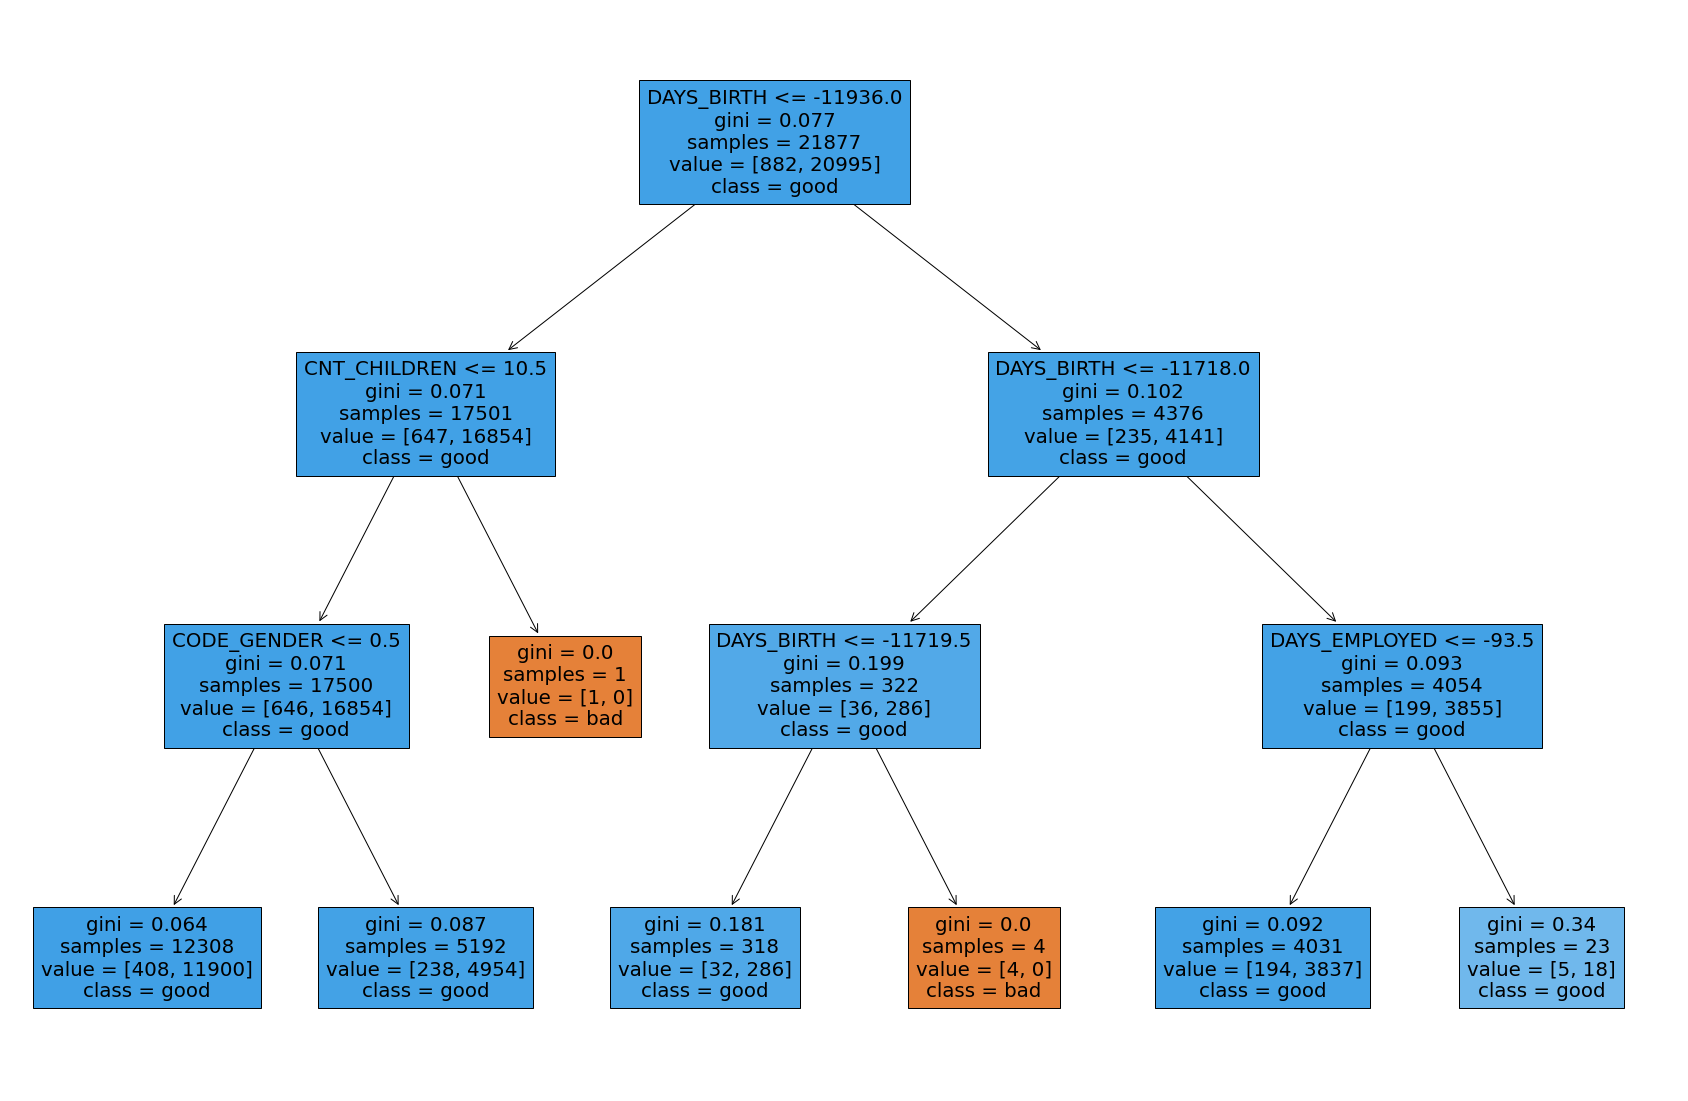

In [172]:
# Code to set the size of the plot
plt.figure(figsize=(30,20))

# Plot the Decision Tree trained above with parameters filled as True
tree.plot_tree(dt11, filled=True,
               feature_names = X_train1.columns,
               class_names = ['bad','good'])


plt.show();

In [155]:
cross_val_score(dt11, X_test1, y_test1, cv=10).mean()

0.958728919816226

As we can see from the decision tree there are several variables that influence the positive response from the bank (good or bad clients) the most: more detailed specification (adding more depth) may help to identify other factors, but, in that case, the risk of overfitting is increasing. They are the age of a person, the number od children, the duration of employment and the gender. 

For example, the very first divide is around the age of 33. Then we can judge that if a person is younger then 32, he or she, probably, will be classified as a 'bad' client according to the data and my own definition of what is good and what is bad. 

The gender factor appeared on the 3rd level ot the decision tree, so I assume that it is a powerful predictor. However, we cannot judge on the essense of the 'gender gap' here, because we cannot see a resolute divide in this branch (both classes are 'good'). Probably, adding more depth will show us something more meaningful. (I tried to increase the depth to 5 **(presented below)**, but there was also no final separation, and a larger increase does not seem relevant to me.) But we can say that if we were the person who decides whether or not to approve a credit card, then the gender of the client would not be the most obvious concern for us.

It is also worth noting the obvious imbalance of the sample, in which the number of good clients significantly exceeds the number of bad ones. This is an evident limitation. Also the classification of good and bad behavior is subjective and could also lead to bias.

In [187]:
dt22 = DecisionTreeClassifier(random_state=random_state, max_depth = 5)

dt22.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=5, random_state=42)

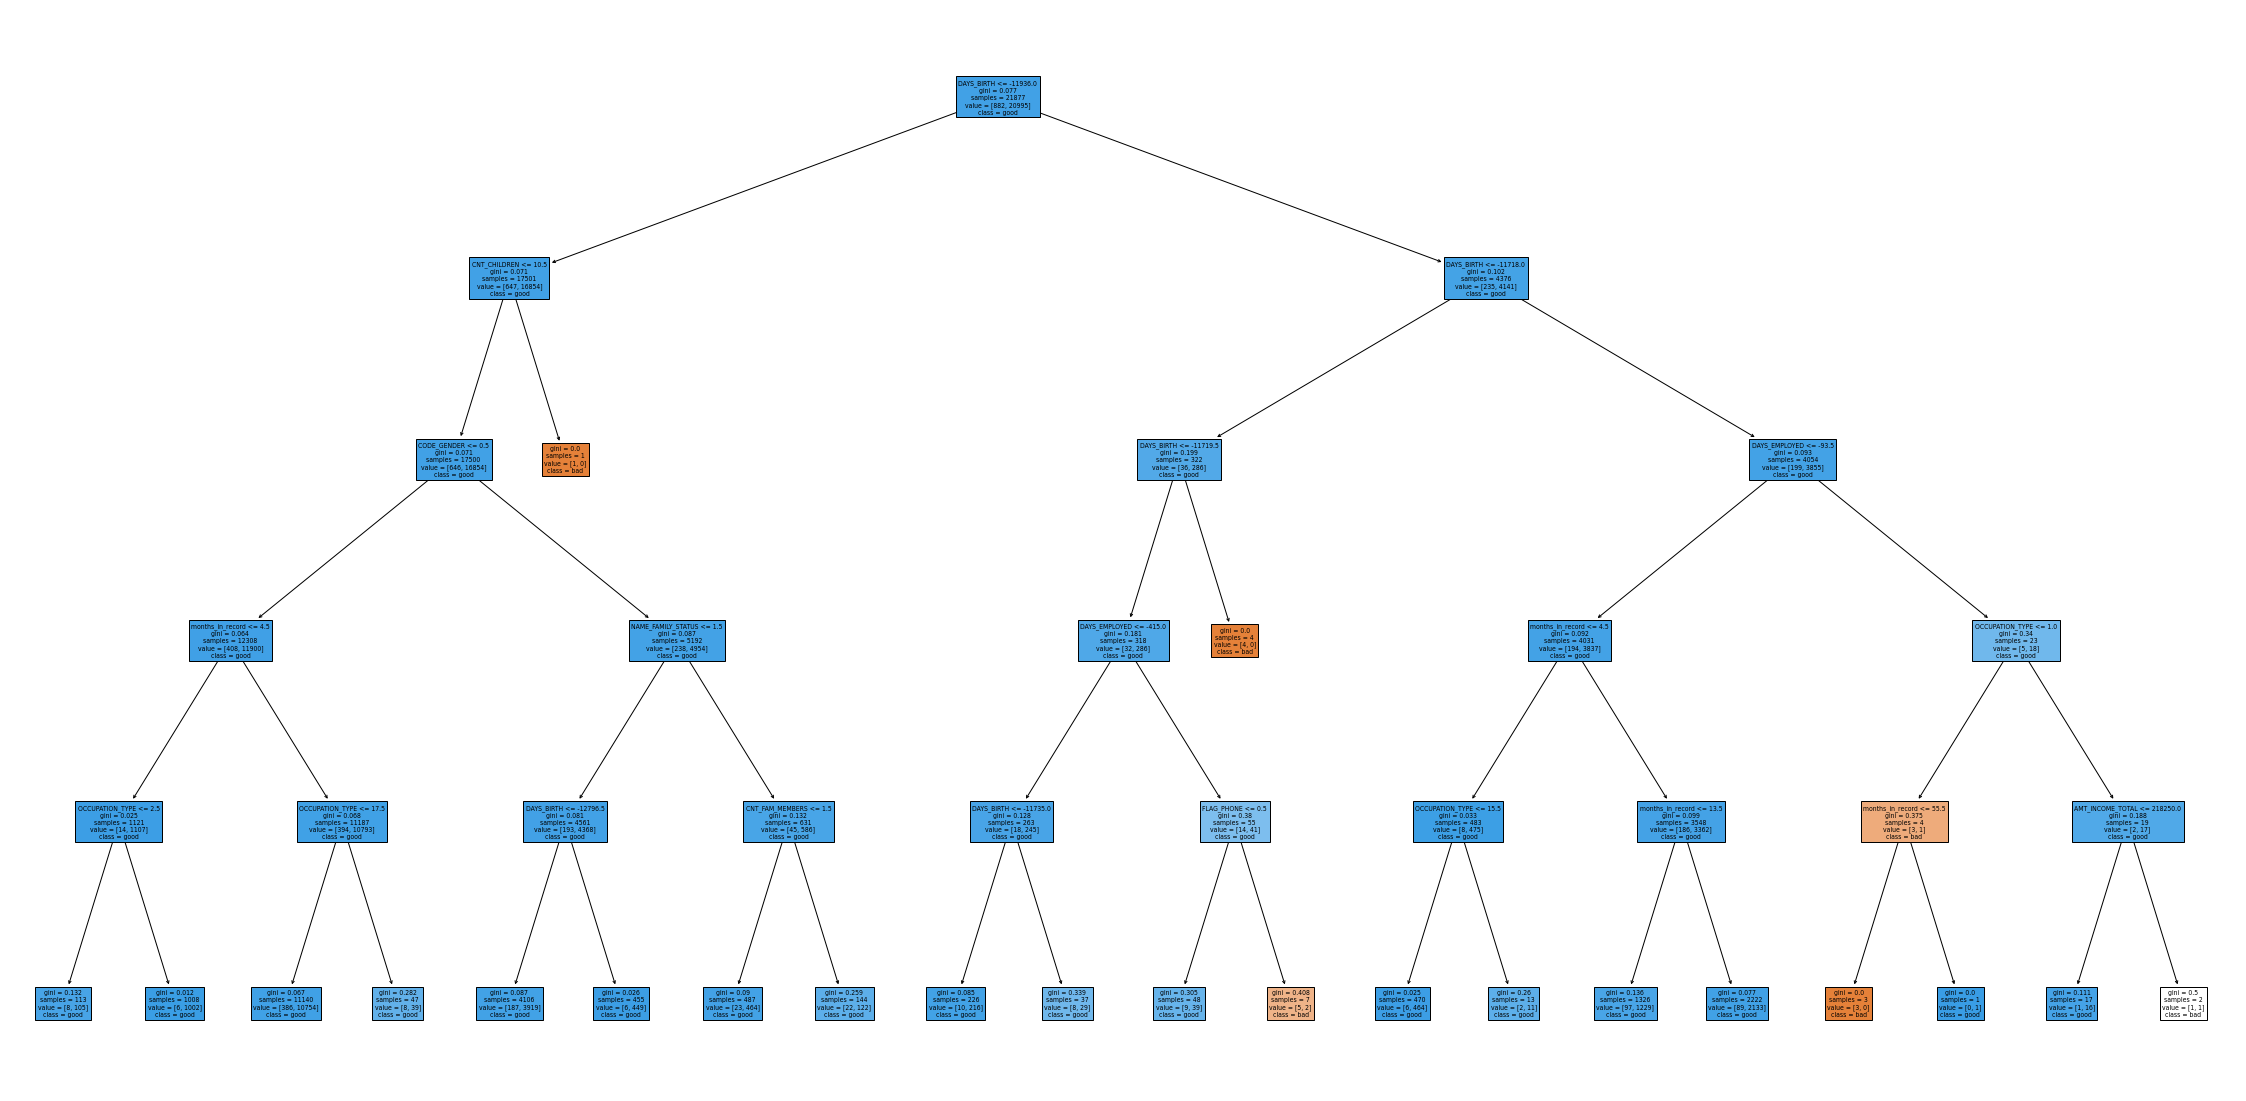

In [188]:
# Code to set the size of the plot
plt.figure(figsize=(40,20))

# Plot the Decision Tree trained above with parameters filled as True
tree.plot_tree(dt22, filled=True,
               feature_names = X_train1.columns,
               class_names = ['bad','good'])


plt.show();

In [189]:
cross_val_score(dt22, X_test1, y_test1, cv=10).mean()

0.9580891471898019

Cross-validation score (calculated 10 times in a row with a different split each time) is slightly smaller for the tree with the depth of 5 compared to the former. That should be interpreted in a way that the accuracy of the 3-depth tree is higher.

## 4/ Logistic regression with sklearn

In [190]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train1,y_train1)
y_pred=lr.predict(X_test1)

In [194]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
cnf_matrix = confusion_matrix(y_test1, y_pred)
cnf_matrix
#rows-true labels, columns - predicted

array([[   0,  383],
       [   0, 8994]], dtype=int64)

In [197]:
print(f'accuracy: {accuracy_score(y_test1, y_pred)}')
print(f'precision: {precision_score(y_test1, y_pred, average="binary")}')
print(f'recall: {recall_score(y_test1, y_pred, average="binary")}')
print(f'f1-score: {f1_score(y_test1, y_pred, average="binary")}')

accuracy: 0.9591553801855605
precision: 0.9591553801855605
recall: 1.0
f1-score: 0.9791519242284036


In [198]:
report = classification_report(y_test1, y_pred, target_names=['bad', 'good'])
print(report)

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00       383
        good       0.96      1.00      0.98      8994

    accuracy                           0.96      9377
   macro avg       0.48      0.50      0.49      9377
weighted avg       0.92      0.96      0.94      9377



C:\ProgramData\Anaconda3\envs\text_m\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\text_m\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\text_m\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Despite the fact that the model performs well, we see that it is extremely poor in identifying bad clients: in fact, it classifies everyone as good ones (for example, recall is equal to one, because all good ones fall into the category of good; and the precision falls compared to in the former, because bad clients are also included in this category). Perhaps that can be due to an unbalanced sample, misclassification, lack of good predictors, or an error in model building (which is most likely, of course).